In [45]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [46]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,7000
1,Michael,29,9000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

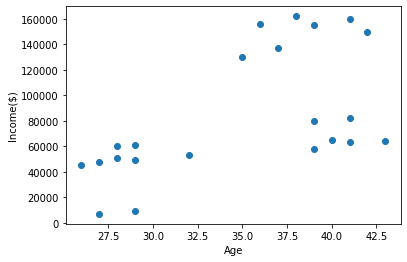

In [47]:
plt.scatter(df["Age"],df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [48]:
km = KMeans(n_clusters=3) # choose the number of clusters / k value
y_predicted = km.fit_predict(df[['Age','Income($)']]) # using built-in k-means algorithm in Python
y_predicted # give us an array of numbers for which where the data points should be cluster under 

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [49]:
df['cluster']=y_predicted # create a new column in our df that shows the respective cluster 
df.head() # see the first five datasets

,Name,Age,Income($),cluster
0,Rob,27,7000,2
1,Michael,29,9000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


In [50]:
km.cluster_centers_ # find the centroids randomly

array([[3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 5.99615385e+04],
       [2.80000000e+01, 8.00000000e+03]])

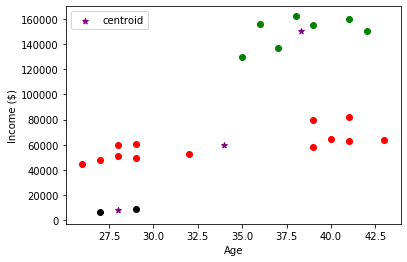

In [51]:
# have a separate dataset for each cluster
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

# Plot them out in a scatter plot, using different colors to differntaie the points
plt.scatter(df1["Age"],df1['Income($)'],color='green')
plt.scatter(df2["Age"],df2['Income($)'],color='red')
plt.scatter(df3["Age"],df3['Income($)'],color='black')

# see the centroids on the scatter plot
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

# label the scatter plot
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [31]:
# use MinMaxScaler to scale the parameters (pre-processing)
scaler = MinMaxScaler()

# scale the income column
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

# scale the age column
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [32]:
df.head() # print out new df that contains scaled values

,Name,Age,Income($),cluster
0,Rob,0.058824,0.000000,0
1,Michael,0.176471,0.012903,0
2,Mohan,0.176471,0.348387,2
3,Ismail,0.117647,0.341935,2
4,Kory,0.941176,0.922581,1


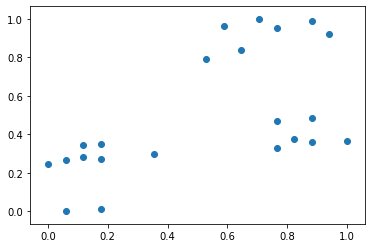

In [33]:
plt.scatter(df.Age,df['Income($)']) # plot the scatter plot using the new df

In [34]:
# reapeat the process of using k-means algo 
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [35]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.000000,1
1,Michael,0.176471,0.012903,1
2,Mohan,0.176471,0.348387,1
3,Ismail,0.117647,0.341935,1
4,Kory,0.941176,0.922581,0


In [36]:
km.cluster_centers_ # centroids

array([[0.72268908, 0.92258065],
       [0.1372549 , 0.2297491 ],
       [0.85294118, 0.39784946]])

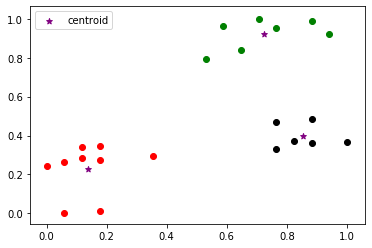

In [37]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

## elbow plot method

In real life, the number of features can be large, so the problem lies on what value of k should we choose. In the elbow method, we test using a number of k values and calculate the equaivalent SSE (Sum of suqared errors) and find the "elbow" in the plot. 

In [38]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

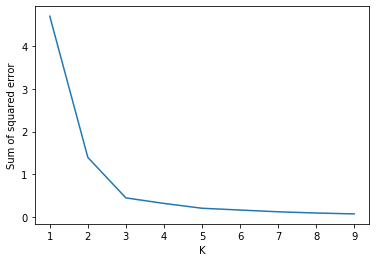

In [39]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)